In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="darkgrid")


# Define the ticker symbol and date range
ticker = input("enter ticker:")  
start_date = "2022-01-01"
end_date = "2024-12-31"

In [4]:
df=yf.download(ticker, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
print("head of data:")
df.head()


head of data:


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700


In [6]:
print("info:")
df.info()

info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-03 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   752 non-null    float64
 1   (High, TSLA)    752 non-null    float64
 2   (Low, TSLA)     752 non-null    float64
 3   (Open, TSLA)    752 non-null    float64
 4   (Volume, TSLA)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB


In [7]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-12-23,430.600006,434.510010,415.410004,431.000000,72698100
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800
2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000


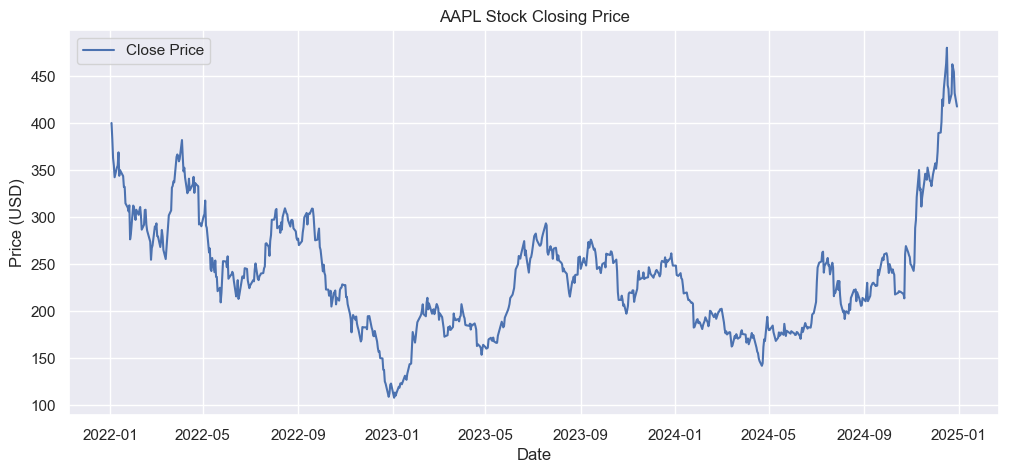

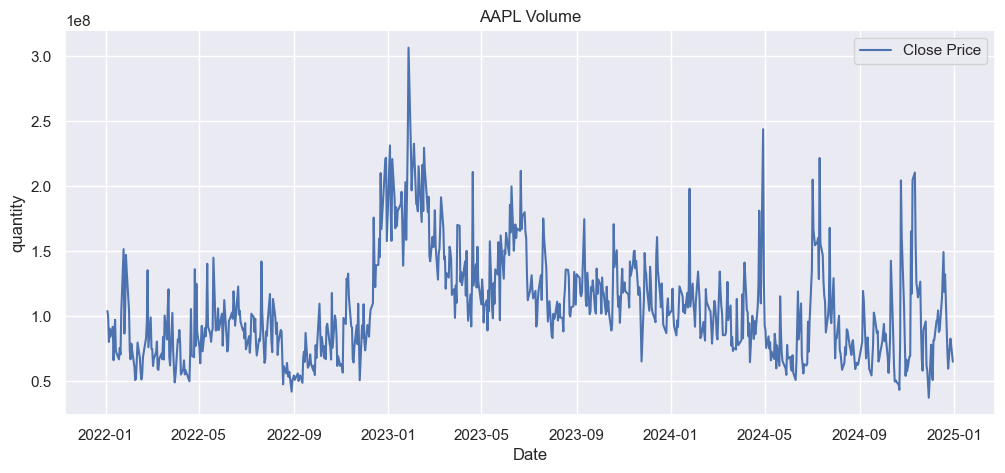

In [8]:
#visualising closing price

plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price')
plt.title('AAPL Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(df['Volume'], label='Close Price')
plt.title('AAPL Volume')
plt.xlabel('Date')
plt.ylabel('quantity')
plt.legend()
plt.grid(True)
plt.show()

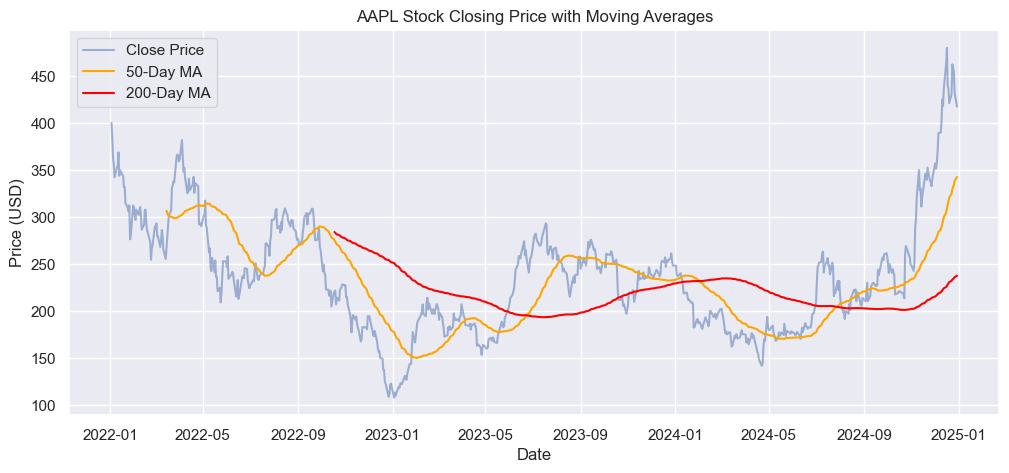

In [9]:
#we are using moving averages to smooth the data and identify trends
# Calculate moving averages

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot closing price and moving averages
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['MA200'], label='200-Day MA', color='rEd')
plt.title('AAPL Stock Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

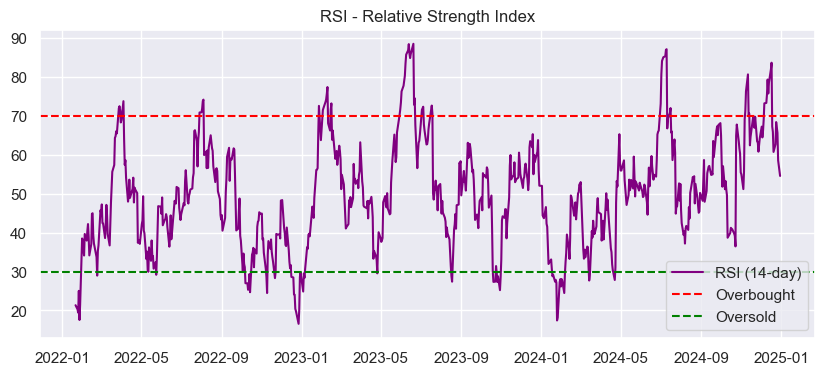

In [10]:
import ta 
rsi_indicator = ta.momentum.RSIIndicator(close=df['Close'].squeeze(), window=14)
df['RSI'] = rsi_indicator.rsi()

# Plot RSI

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df['RSI'], label='RSI (14-day)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('RSI - Relative Strength Index')
plt.legend()
plt.grid(True)
plt.show()


### starting data preparation

In [22]:
df_model=df[['Close', 'MA50', 'MA200', 'RSI']].dropna()

df_model.head()

Price,Close,MA50,MA200,RSI
Ticker,TSLA,,,
Date,,,,
2022-10-18,220.190002,275.395002,284.122917,34.869400
2022-10-19,222.039993,274.169135,283.233483,36.084335
2022-10-20,207.279999,272.427601,282.353900,31.099779
2022-10-21,214.440002,270.983801,281.612567,35.737226
2022-10-24,211.250000,269.208201,280.894317,34.619235


In [23]:
df_model['target']= df_model['Close'].shift(-1)

df_model.dropna()
df_model.head()



Price,Close,MA50,MA200,RSI,target
Ticker,TSLA,,,,
Date,,,,,
2022-10-18,220.190002,275.395002,284.122917,34.869400,222.039993
2022-10-19,222.039993,274.169135,283.233483,36.084335,207.279999
2022-10-20,207.279999,272.427601,282.353900,31.099779,214.440002
2022-10-21,214.440002,270.983801,281.612567,35.737226,211.250000
2022-10-24,211.250000,269.208201,280.894317,34.619235,222.419998


In [24]:
X=df_model.drop('target', axis=1)

y=df_model['target']
print(df_model[['Close', 'target']].tail()) 
df_model = df_model.dropna() 
print(df_model[['Close', 'target']].tail()) 


Price            Close      target
Ticker            TSLA            
Date                              
2024-12-23  430.600006  462.279999
2024-12-24  462.279999  454.130005
2024-12-26  454.130005  431.660004
2024-12-27  431.660004  417.410004
2024-12-30  417.410004         NaN
Price            Close      target
Ticker            TSLA            
Date                              
2024-12-20  421.059998  430.600006
2024-12-23  430.600006  462.279999
2024-12-24  462.279999  454.130005
2024-12-26  454.130005  431.660004
2024-12-27  431.660004  417.410004


In [44]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)






In [45]:
#scaling the data for our models


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Testing out models

## Linear regression

In [46]:
#model training
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_scaled, y_train)



LinearRegression()

In [47]:
#model prediction
y_pred=model.predict(X_test_scaled)
y_test=y_test.dropna()
y_pred = y_pred[:-1]



In [48]:
#evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

print("last predictions")
print(y_pred[-1:])
print("last actual values")
print(y_test[-1:])

MAE: 8.449724536376928
MSE: 152.6082988712764
R²: 0.9735633582319411
last predictions
[417.62056566]
last actual values
Date
2024-12-27    417.410004
Name: target, dtype: float64


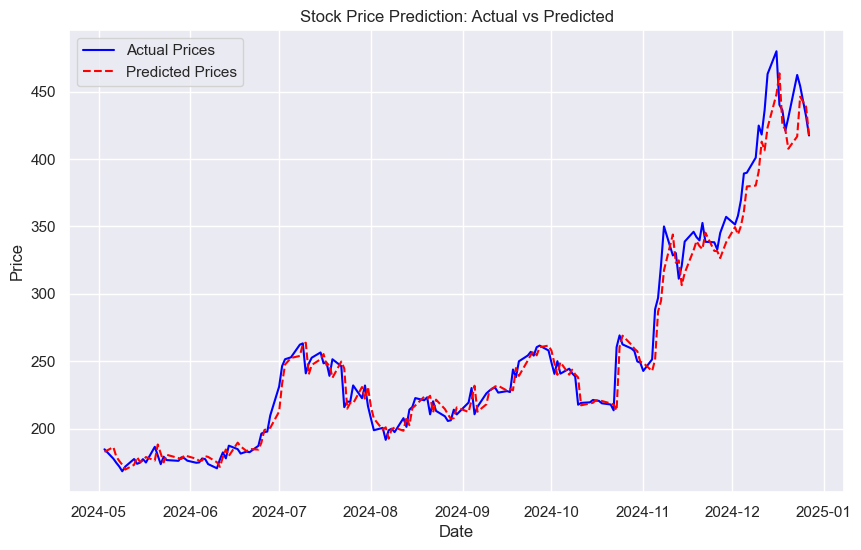

In [49]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [50]:
import joblib

# Save the trained model
joblib.dump(model, 'linear_model.pkl')

# Save the scaler if you're using MinMaxScaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Random Forest

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to tune the hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_scaled, y_train)

# Best hyperparameters
print(f"Best hyperparameters (Random Forest): {grid_search_rf.best_params_}")


Best hyperparameters (Random Forest): {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [34]:
rf_model = RandomForestRegressor(**grid_search_rf.best_params_, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf = y_pred_rf[:-1]
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 39.86679383571289
MSE: 4609.100168223327
R²: 0.24378626436230144


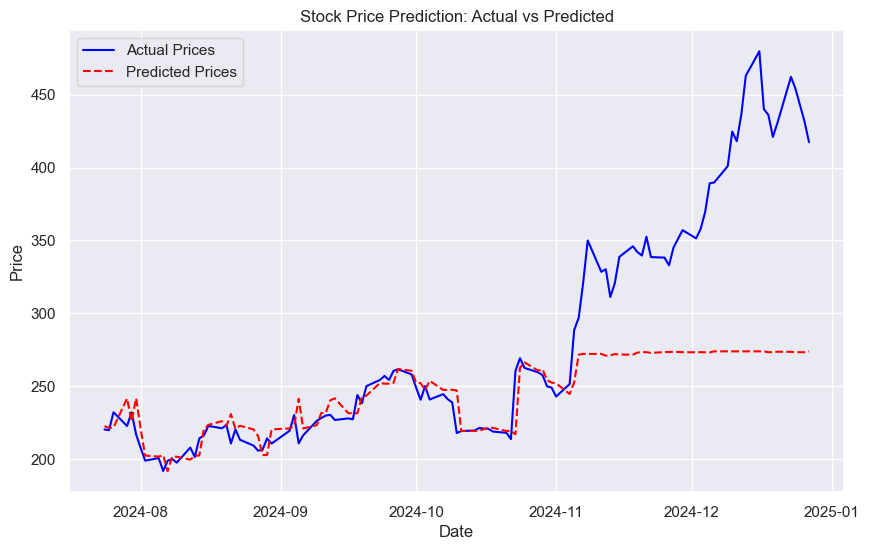

In [35]:
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices', color='red', linestyle='--')
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
joblib.dump(model, 'RANDOM_FOREST_model.pkl')

['RANDOM_FOREST_model.pkl']

poor results

# SVM

In [50]:
# Importing necessary libraries for SVR
from sklearn.svm import SVR

# Define the hyperparameter grid for SVR
param_grid_svr = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Initialize SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Use GridSearchCV to tune the hyperparameters
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train_scaled, y_train)

# Best hyperparameters
print(f"Best hyperparameters (SVR): {grid_search_svr.best_params_}")
svr_model = SVR(**grid_search_svr.best_params_)
svr_model.fit(X_train_scaled, y_train)

y_pred_svm = rf_model.predict(X_test_scaled)
y_pred_svm = y_pred_svm[:-1]
mae = mean_absolute_error(y_test, y_pred_svm)
mse = mean_squared_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

Best hyperparameters (SVR): {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
MAE: 8.577893739568774
MSE: 96.9245728372273
R²: 0.19247405862186584


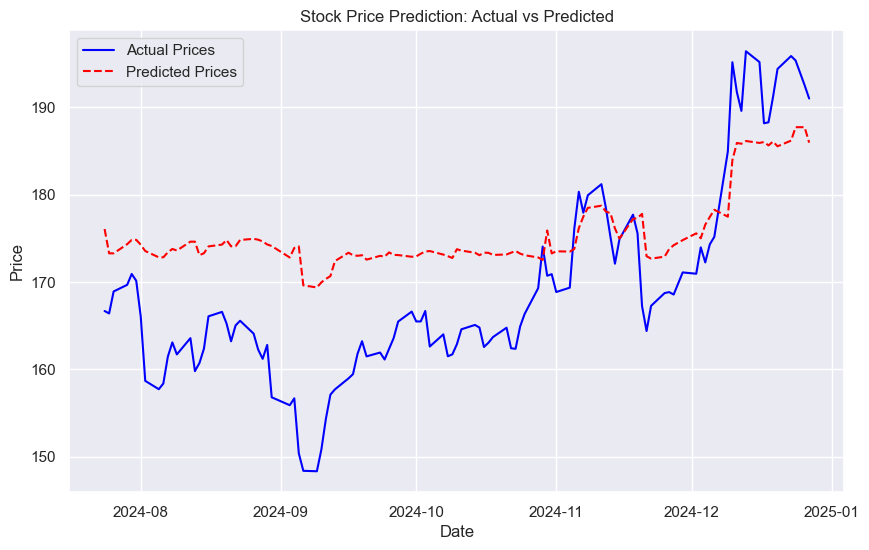

In [51]:
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred_svm, label='Predicted Prices', color='red', linestyle='--')
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# LSTM: LONG SHORT-TERM MEMORY

In [72]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [73]:
window_size = 60

# Use same features and target
features = ['Close', 'MA50', 'MA200', 'RSI', 'Volume']
target = 'Close'

# Drop NaNs
df_lstm = df_model[features].dropna()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)

# Create sequences
X_lstm = []
y_lstm = []

for i in range(window_size, len(scaled_data)):
    X_lstm.append(scaled_data[i - window_size:i])
    y_lstm.append(scaled_data[i, 0])  # Predicting 'Close'

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)


In [74]:
split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]


In [75]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


c:\Users\123ze\Desktop\PADHAI\course-ds,nlp,dl\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0233 - val_loss: 0.0064
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.3386e-04 - val_loss: 0.0022
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.5387e-04 - val_loss: 0.0023
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.9438e-04 - val_loss: 0.0020
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.

In [76]:
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Only inverse scale the 'Close' column
predicted_prices = scaler.inverse_transform(
    np.concatenate((y_pred_lstm, np.zeros((len(y_pred_lstm), len(features) - 1))), axis=1)
)[:, 0]

actual_prices = scaler.inverse_transform(
    np.concatenate((y_test_lstm.reshape(-1, 1), np.zeros((len(y_test_lstm), len(features) - 1))), axis=1)
)[:, 0]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


LSTM MAE: 31.445315915141045
LSTM MSE: 2191.1778244235493
LSTM R²: 0.6419005921250238


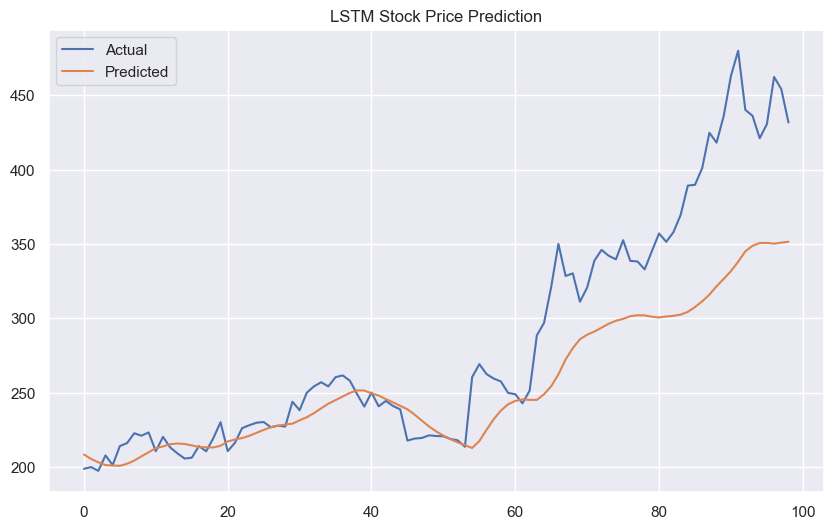

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("LSTM MAE:", mean_absolute_error(actual_prices, predicted_prices))
print("LSTM MSE:", mean_squared_error(actual_prices, predicted_prices))
print("LSTM R²:", r2_score(actual_prices, predicted_prices))

plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()


In [79]:
import joblib

# Save the trained model
joblib.dump(model, 'linear_model.pkl')

# Save the scaler if you're using MinMaxScaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [81]:
latest_data = df_model.drop('target', axis=1).iloc[-1:]
latest_scaled = scaler.transform(latest_data)
next_day_prediction = model.predict(latest_scaled)

print("Predicted next closing price:", next_day_prediction[0])

Predicted next closing price: 268.33540475338737


C:\Users\123ze\AppData\Local\Temp\ipykernel_20548\739076158.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  latest_data = df_model.drop('target', axis=1).iloc[-1:]


['scaler.pkl']